## Topic Modeling of Tweets Related to Abortion
### Berra Karayel 0054477

In [10]:
!pip install git+https://github.com/rwalk/gsdmm.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rwalk/gsdmm.git to /tmp/pip-req-build-vqfn0scj
  Running command git clone --filter=blob:none --quiet https://github.com/rwalk/gsdmm.git /tmp/pip-req-build-vqfn0scj
  Resolved https://github.com/rwalk/gsdmm.git to commit 4ad1b6b6976743681ee4976b4573463d359214ee
  Preparing metadata (setup.py) ... done


In [2]:
import numpy as np 
import pandas as pd

from gsdmm import MovieGroupProcess

from gensim.models.coherencemodel import CoherenceModel
from gensim import corpora, models
from gensim.utils import simple_preprocess
import gensim, spacy
from gensim.models.ldamulticore import LdaMulticore
import re


from gensim.models import Phrases
from gensim.models.phrases import Phraser

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [3]:
from sklearn.model_selection import GridSearchCV

In [13]:
data1 = pd.read_csv('/content/predictionsofabortion.csv', encoding='utf-8')
data1

,Tweet,Predictions
0,"['kürtaj', 'konusunda', 'kararım', 'net', 'muh...",neutral
1,"['neden', 'kürtaj', 've', 'son', 'çaremi']",neutral
2,"['bilime', 'de', 'el', 'attılari̇stanbul', 'i̇...",neutral
3,"['radikal', 'kürtaj', 'protestosu', 'bariyeri'...",neutral
4,"['kürtaj', 'yapılıyeah']",neutral
...,...,...
204948,"['polonyalı', 'kadınlar', 'direndi', 'kürtaj',...",neutral
204949,"['i̇tiraf', 'ediyorum', 'hem', 'kürtaj', 'oldu...",neutral
204950,"['kürtaj', 'yapıyaa', 'burda']",neutral
204951,"['kürtaj', 'yasal', 'değil', 'isteyenler', 'ağ...",positive


In [14]:
negative = data1[data1["Predictions"] == "negative"]
negative

,Tweet,Predictions
55,"['kürtaj', 'haktır', 'diyenler', 'size', 'o', ...",negative
71,"['bu', 'insanların', 'ne', 'olduklarını', 'biz...",negative
107,"['kürtaj', 'i̇çi̇n', 'hami̇le', 'oldunuz', '',...",negative
131,"['kürtaj', 'cinayet', 'işte', 'ağlamayın', 'zı...",negative
148,"['kürtajı', 'bir', 'hak', 'olarak', 'gören', '...",negative
...,...,...
204733,"['kürtaj', 'günah', 'allah', 'rızkıyla', 'veri...",negative
204756,"['bu', 'salak', 'kim', 'amk', 'malı', 'beratin...",negative
204839,"['canslarım', 'benim', 'bi', 'kaç', 'zaman', '...",negative
204901,"['kevorkyanı', 'anlatan', 'filmde', 'ötanaziye...",negative


In [15]:
negative.shape

(4954, 2)

In [16]:
# create N-grams
def make_n_grams(texts):
    bigram = gensim.models.Phrases(texts, min_count=5, threshold=100)  # higher threshold fewer phrases.
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram = gensim.models.Phrases(bigram[texts], threshold=100)
    trigram_mod = gensim.models.phrases.Phraser(trigram)
    bigrams_text = [bigram_mod[doc] for doc in texts]
    trigrams_text =  [trigram_mod[bigram_mod[doc]] for doc in bigrams_text]
    return trigrams_text

In [17]:
negative['Tweet'] = negative.Tweet.values.tolist()

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence)))

<ipython-input-17-a19fa7536159>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative['Tweet'] = negative.Tweet.values.tolist()


In [18]:
tokens_tweets = list(sent_to_words(negative['Tweet']))

GSDMM

Hyper-parameters of the GSDMM model:

- K = 6. It is the number of clusters. We set this value after several experiments in which we started from 15 clusters. As we increased the number of clusters, the empty clusters started to appear. This was why we settled with 6 clusters. 

Hyperparameters; (These default parameters would work for many short texts.)

- alpha =0.01 1 and beta = 0.01. 

- n_iters = 30.  Number of iteration.

In [19]:
np.random.seed(0) #for reproducability

In [20]:
tokens_tweets = list(sent_to_words(negative["Tweet"]))

In [21]:
mgp = MovieGroupProcess(K=15, alpha=0.01, beta=0.01, n_iters=30) 

vocab = set(x for tweet in tokens_tweets for x in tweet)
n_terms = len(vocab)
model = mgp.fit(tokens_tweets, n_terms)

In stage 0: transferred 3936 clusters with 15 clusters populated
In stage 1: transferred 1809 clusters with 15 clusters populated
In stage 2: transferred 1103 clusters with 15 clusters populated
In stage 3: transferred 847 clusters with 15 clusters populated
In stage 4: transferred 779 clusters with 15 clusters populated
In stage 5: transferred 666 clusters with 15 clusters populated
In stage 6: transferred 567 clusters with 15 clusters populated
In stage 7: transferred 553 clusters with 15 clusters populated
In stage 8: transferred 514 clusters with 15 clusters populated
In stage 9: transferred 472 clusters with 15 clusters populated
In stage 10: transferred 420 clusters with 15 clusters populated
In stage 11: transferred 384 clusters with 15 clusters populated
In stage 12: transferred 410 clusters with 15 clusters populated
In stage 13: transferred 377 clusters with 15 clusters populated
In stage 14: transferred 398 clusters with 15 clusters populated
In stage 15: transferred 425 clu

In [22]:
def top_words(cluster_word_distribution, top_cluster, values):
    for cluster in top_cluster:
        sort_dicts =sorted(mgp.cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
        print("\nCluster %s : %s"%(cluster,sort_dicts))

In [23]:
doc_count = np.array(mgp.cluster_doc_count)
print('Number of documents per topic :', doc_count)

# topics sorted by the number of document they are allocated to
top_index = doc_count.argsort()[-15:][::-1]
print('\nMost important clusters (by number of docs inside):', top_index)
# show the top 5 words in term frequency for each cluster 
top_words(mgp.cluster_word_distribution, top_index, 20)

Number of documents per topic : [220 313 649 236 289 669 311 263 184 812 184 284 108 248 184]

Most important clusters (by number of docs inside): [ 9  5  2  1  6  4 11  7 13  3  0 14 10  8 12]

Cluster 9 : [('bir', 948), ('kürtaj', 934), ('bu', 320), ('değil', 291), ('kadar', 256), ('ve', 249), ('da', 244), ('cinayet', 226), ('ne', 168), ('bebek', 165), ('için', 150), ('hak', 138), ('ama', 135), ('anne', 134), ('de', 125), ('sonra', 113), ('olarak', 110), ('ki', 99), ('daha', 85), ('gibi', 81)]

Cluster 5 : [('bir', 790), ('kürtaj', 772), ('değil', 276), ('bu', 263), ('cinayet', 193), ('kadar', 174), ('da', 174), ('ve', 170), ('ne', 164), ('hak', 153), ('ama', 136), ('de', 132), ('için', 93), ('olarak', 76), ('kadının', 76), ('ki', 71), ('sadece', 67), ('ya', 63), ('benim', 62), ('gibi', 61)]

Cluster 2 : [('kürtaj', 730), ('bir', 390), ('bu', 247), ('ne', 213), ('değil', 182), ('kadar', 162), ('cinayet', 158), ('da', 122), ('ve', 115), ('ama', 115), ('de', 112), ('günah', 103), ('siz

In [24]:
gsdmm_clusters = [

["Cluster 9 : [('bir', 948), ('kürtaj', 934), ('bu', 320), ('değil', 291), ('kadar', 256), ('ve', 249), ('da', 244), ('cinayet', 226), ('ne', 168), ('bebek', 165), ('için', 150), ('hak', 138), ('ama', 135), ('anne', 134), ('de', 125), ('sonra', 113), ('olarak', 110), ('ki', 99), ('daha', 85), ('gibi', 81)"],

["Cluster 5 : [('bir', 790), ('kürtaj', 772), ('değil', 276), ('bu', 263), ('cinayet', 193), ('kadar', 174), ('da', 174), ('ve', 170), ('ne', 164), ('hak', 153), ('ama', 136), ('de', 132), ('için', 93), ('olarak', 76), ('kadının', 76), ('ki', 71), ('sadece', 67), ('ya', 63), ('benim', 62), ('gibi', 61)"],
["Cluster 2 : [('kürtaj', 730), ('bir', 390), ('bu', 247), ('ne', 213), ('değil', 182), ('kadar', 162), ('cinayet', 158), ('da', 122), ('ve', 115), ('ama', 115), ('de', 112), ('günah', 103), ('siz', 95), ('için', 92), ('ki', 81), ('ya', 79), ('her', 71), ('çocuk', 66), ('diye', 64), ('mi', 64)"],
["Cluster 1 : [('kürtaj', 314), ('ağaç', 101), ('bu', 97), ('karşı', 83), ('için', 79), ('kurban', 72), ('ne', 71), ('bir', 62), ('diyen', 61), ('kadar', 57), ('zihniyet', 55), ('benim', 53), ('cinayet', 47), ('hakkımdır', 44), ('yasağına', 43), ('değil', 42), ('bebeği', 41), ('aynı', 40), ('öldürmek', 40), ('diyerek', 40)"],
["Cluster 6 : [('kürtaj', 336), ('bir', 135), ('bu', 123), ('vatan', 103), ('ne', 88), ('kadar', 66), ('da', 61), ('allah', 59), ('de', 52), ('burda', 47), ('biz', 41), ('haini', 40), ('sonra', 39), ('ki', 37), ('diye', 35), ('için', 34), ('değil', 32), ('bi', 31), ('cinayet', 28), ('ve', 26)"],
["Cluster 4 : [('kürtaj', 309), ('bir', 165), ('bu', 157), ('ne', 109), ('kadar', 103), ('değil', 99), ('ve', 67), ('da', 67), ('allah', 65), ('sonra', 57), ('de', 45), ('ama', 43), ('cinayet', 36), ('var', 36), ('ben', 35), ('için', 34), ('tek', 31), ('olur', 30), ('diye', 30), ('olarak', 30)"],
["Cluster 11 : [('kürtaj', 288), ('bir', 94), ('cinayet', 88), ('haram', 84), ('ne', 76), ('günah', 67), ('bu', 66), ('ve', 60), ('allah', 56), ('kadar', 55), ('kurban', 45), ('değil', 44), ('hak', 42), ('ama', 42), ('evet', 39), ('da', 33), ('cinayettir', 29), ('helaldir', 28), ('insan', 26), ('oluyor', 26)"],
["Cluster 7 : [('kürtaj', 278), ('bir', 234), ('bu', 113), ('ve', 81), ('kadar', 65), ('ne', 62), ('değil', 62), ('de', 45), ('da', 42), ('için', 40), ('insan', 39), ('ama', 36), ('olarak', 34), ('sadece', 32), ('diye', 31), ('cinayet', 30), ('günah', 29), ('çok', 28), ('tek', 28), ('sonra', 27)"],
["Cluster 13 : [('için', 615), ('oldunuz', 451), ('kürtaj', 244), ('ağaç', 231), ('ayyaş', 224), ('hamile', 182), ('darbe', 177), ('çki', 172), ('olun', 157), ('insan', 152), ('ölüyor', 140), ('insanlar', 113), ('mısırda', 97), ('çi', 79), ('birazcıkda', 64), ('nsan', 51), ('hami', 44), ('le', 44), ('bi', 42), ('geziruhsuzdur', 42)"],
["Cluster 3 : [('kürtaj', 244), ('bir', 83), ('bu', 81), ('değil', 68), ('ne', 59), ('kadar', 56), ('ve', 49), ('cinayet', 42), ('ama', 41), ('allah', 41), ('bi', 40), ('de', 39), ('tek', 37), ('da', 35), ('günah', 34), ('sonra', 32), ('çi', 31), ('diye', 27), ('ya', 26), ('mi', 24)"],
["Cluster 0 : [('kürtaj', 363), ('bir', 328), ('her', 175), ('ve', 105), ('cinayet', 99), ('uluderedir', 96), ('yapan', 92), ('tek', 85), ('literatüründe', 79), ('tarihte', 79), ('ülkeyiz', 72), ('uludere', 71), ('ilk', 69), ('fyla', 67), ('tıp', 65), ('cinayettir', 32), ('beşikçi', 29), ('smail', 26), ('ise', 23), ('haram', 20)"],
["Cluster 14 : [('kürtaj', 188), ('deyip', 78), ('kesmeye', 76), ('kurban', 74), ('allah', 73), ('için', 67), ('anne', 62), ('bebeği', 52), ('bir', 49), ('karnındaki', 48), ('aynı', 47), ('diri', 46), ('rızası', 45), ('savunanlarla', 37), ('yobazlık', 37), ('cahiliye', 37), ('saldıranlar', 35), ('cinayet', 33), ('kız', 33), ('ne', 31)"],
["Cluster 10 : [('kürtaj', 191), ('bir', 116), ('cinayet', 87), ('olarak', 48), ('kürtajı', 45), ('görüyorum', 40), ('hakkında', 37), ('tartışmaları', 35), ('diye', 34), ('tayyip', 34), ('ve', 31), ('erdoğan', 31), ('günah', 28), ('büyük', 27), ('da', 26), ('insan', 24), ('ağaç', 23), ('tane', 23), ('değil', 23), ('bu', 21)"],
["Cluster 8 : [('kürtaj', 203), ('bir', 103), ('cinayet', 102), ('değil', 47), ('da', 45), ('bu', 42), ('midir', 37), ('hak', 35), ('için', 35), ('ağaç', 29), ('ve', 27), ('diye', 23), ('ne', 23), ('hayvan', 21), ('parça', 21), ('mi', 16), ('milyon', 15), ('hakları', 14), ('anne', 14), ('diri', 14)"],
["Cluster 12 : [('da', 153), ('kürtaj', 91), ('diye', 85), ('mu', 79), ('değil', 77), ('vibratör', 77), ('sapık', 72), ('namus', 71), ('istiyoruz', 71), ('pankartları', 71), ('müslümanlara', 71), ('yüzyıldayız', 71), ('diyin', 69), ('sevişip', 65), ('diktatör', 63), ('bneyiz', 63), ('dönmeyiz', 62), ('lezbiyeniz', 62), ('neymiş', 62), ('evlenmeyin', 61)"]]



In [25]:
gsdmm_clusters = pd.DataFrame.from_dict(gsdmm_clusters)

In [26]:
gsdmm_clusters

,0
0,"Cluster 9 : [('bir', 948), ('kürtaj', 934), ('..."
1,"Cluster 5 : [('bir', 790), ('kürtaj', 772), ('..."
2,"Cluster 2 : [('kürtaj', 730), ('bir', 390), ('..."
3,"Cluster 1 : [('kürtaj', 314), ('ağaç', 101), (..."
4,"Cluster 6 : [('kürtaj', 336), ('bir', 135), ('..."
5,"Cluster 4 : [('kürtaj', 309), ('bir', 165), ('..."
6,"Cluster 11 : [('kürtaj', 288), ('bir', 94), ('..."
7,"Cluster 7 : [('kürtaj', 278), ('bir', 234), ('..."
8,"Cluster 13 : [('için', 615), ('oldunuz', 451),..."
9,"Cluster 3 : [('kürtaj', 244), ('bir', 83), ('b..."


In [27]:
gsdmm_clusters.columns

RangeIndex(start=0, stop=1, step=1)

In [28]:
gsdmm_clusters.rename(columns={0: "Dominant Keywords for GSDMM Clusters"}, inplace=True)

In [29]:
type(gsdmm_clusters)

pandas.core.frame.DataFrame

In [30]:
gsdmm_clusters.columns

Index(['Dominant Keywords for GSDMM Clusters'], dtype='object')

In [31]:
gsdmm_clusters[['Cluster No.(Importance)','Dominant Keywords:GSDMM']] = gsdmm_clusters["Dominant Keywords for GSDMM Clusters"].str.split(":",expand=True,)
gsdmm_clusters

,Dominant Keywords for GSDMM Clusters,Cluster No.(Importance),Dominant Keywords:GSDMM
0,"Cluster 9 : [('bir', 948), ('kürtaj', 934), ('...",Cluster 9,"[('bir', 948), ('kürtaj', 934), ('bu', 320), ..."
1,"Cluster 5 : [('bir', 790), ('kürtaj', 772), ('...",Cluster 5,"[('bir', 790), ('kürtaj', 772), ('değil', 276..."
2,"Cluster 2 : [('kürtaj', 730), ('bir', 390), ('...",Cluster 2,"[('kürtaj', 730), ('bir', 390), ('bu', 247), ..."
3,"Cluster 1 : [('kürtaj', 314), ('ağaç', 101), (...",Cluster 1,"[('kürtaj', 314), ('ağaç', 101), ('bu', 97), ..."
4,"Cluster 6 : [('kürtaj', 336), ('bir', 135), ('...",Cluster 6,"[('kürtaj', 336), ('bir', 135), ('bu', 123), ..."
5,"Cluster 4 : [('kürtaj', 309), ('bir', 165), ('...",Cluster 4,"[('kürtaj', 309), ('bir', 165), ('bu', 157), ..."
6,"Cluster 11 : [('kürtaj', 288), ('bir', 94), ('...",Cluster 11,"[('kürtaj', 288), ('bir', 94), ('cinayet', 88..."
7,"Cluster 7 : [('kürtaj', 278), ('bir', 234), ('...",Cluster 7,"[('kürtaj', 278), ('bir', 234), ('bu', 113), ..."
8,"Cluster 13 : [('için', 615), ('oldunuz', 451),...",Cluster 13,"[('için', 615), ('oldunuz', 451), ('kürtaj', ..."
9,"Cluster 3 : [('kürtaj', 244), ('bir', 83), ('b...",Cluster 3,"[('kürtaj', 244), ('bir', 83), ('bu', 81), ('..."


In [32]:
# I didn`t rename the clusters

topic_dict = {}
topic_names = ['type 1',
               'type 2',
               'type 3',
               'type 4',
               'type 5',
               'type 6',
               'type 7',
               'type 8',
               'type 9',
               'type 10',
               'type 11',
               'type 12',
               'type 13',
               'type 14',
               'type 15'
              ]
for i, topic_num in enumerate(top_index):
    topic_dict[topic_num]=topic_names[i] 

In [33]:
def create_topics_dataframe(negative_text=negative.Tweet,  mgp=mgp, threshold=0.3, topic_dict=topic_dict, lemma_text=tokens_tweets):
    result = pd.DataFrame(columns=['Text', 'Topic', 'Rating', 'Lemma-text'])
    for i, text in enumerate(negative_text):
        result.at[i, 'Text'] = text
        #result.at[i, 'Rating'] = data.Rating[i]
        result.at[i, 'Lemma-text'] = lemma_text[i]
        prob = mgp.choose_best_label(tokens_tweets[i])
        if prob[1] >= threshold:
            result.at[i, 'Topic'] = topic_dict[prob[0]]
        else:
            result.at[i, 'Topic'] = 'Other'
    return result

In [36]:
result = create_topics_dataframe(negative_text=negative.Tweet, mgp=mgp, threshold=0.3, topic_dict=topic_dict, lemma_text=tokens_tweets)
result.head(16)

,Text,Topic,Rating,Lemma-text
0,"['kürtaj', 'haktır', 'diyenler', 'size', 'o', ...",type 7,NaN,"[kürtaj, haktır, diyenler, size, hakkı, kim, v..."
1,"['bu', 'insanların', 'ne', 'olduklarını', 'biz...",type 4,NaN,"[bu, insanların, ne, olduklarını, biz, çok, iy..."
2,"['kürtaj', 'i̇çi̇n', 'hami̇le', 'oldunuz', '',...",type 9,NaN,"[kürtaj, çi, hami, le, oldunuz, darbe, çi, ağa..."
3,"['kürtaj', 'cinayet', 'işte', 'ağlamayın', 'zı...",type 8,NaN,"[kürtaj, cinayet, işte, ağlamayın, zırlamayın,..."
4,"['kürtajı', 'bir', 'hak', 'olarak', 'gören', '...",type 2,NaN,"[kürtajı, bir, hak, olarak, gören, zihniyet, k..."
5,"['eyçapulcular', 'kürtaj', 'i̇çi̇n', 'hami̇le'...",type 9,NaN,"[eyçapulcular, kürtaj, çi, hami, le, oldunuz, ..."
6,"['nefislerine', 'köle', 'olanlar', 'ahlaksızca...",type 10,NaN,"[nefislerine, köle, olanlar, ahlaksızca, her, ..."
7,"['sen', 'oruspuluk', 'yapacaksın', 'diye', 'bi...",type 10,NaN,"[sen, oruspuluk, yapacaksın, diye, birbebek, k..."
8,"['kürtaj', 'cinayet', 'midir', 'tartışması', '...",type 1,NaN,"[kürtaj, cinayet, midir, tartışması, bilimsel,..."
9,"['şu', 'sevilesi', 'akp', 'hükumetine', 'tek',...",type 10,NaN,"[şu, sevilesi, akp, hükumetine, tek, basit, bi..."


# Visualization for the GSDM model


In [37]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [39]:
import plotly.express as px

fig = px.pie(result, names='Topic',  title="Figure 4. GSDMM for Abortion Tweets with Negative Sentiment", color_discrete_sequence=px.colors.sequential.Burg)
fig.show()

In [40]:
result['len'] = result.Text.apply(lambda row: len(row.split()))
result.head()

,Text,Topic,Rating,Lemma-text,len
0,"['kürtaj', 'haktır', 'diyenler', 'size', 'o', ...",type 7,NaN,"[kürtaj, haktır, diyenler, size, hakkı, kim, v...",14
1,"['bu', 'insanların', 'ne', 'olduklarını', 'biz...",type 4,NaN,"[bu, insanların, ne, olduklarını, biz, çok, iy...",16
2,"['kürtaj', 'i̇çi̇n', 'hami̇le', 'oldunuz', '',...",type 9,NaN,"[kürtaj, çi, hami, le, oldunuz, darbe, çi, ağa...",20
3,"['kürtaj', 'cinayet', 'işte', 'ağlamayın', 'zı...",type 8,NaN,"[kürtaj, cinayet, işte, ağlamayın, zırlamayın,...",41
4,"['kürtajı', 'bir', 'hak', 'olarak', 'gören', '...",type 2,NaN,"[kürtajı, bir, hak, olarak, gören, zihniyet, k...",18


In [41]:
import matplotlib.pyplot as plt

## WordClouds

In [42]:
result['Lemma_text'] = result['Lemma-text'].apply(lambda row: ' '.join(row))

In [43]:
result = result.drop('Lemma-text', axis=1)

In [44]:
from wordcloud import WordCloud 

In [64]:
my_stopwords = ["kürtaj", "böyle", "bir", "bu", "şey", "mi", "mı", "var", "ki", "ama", "diye", "her", "tamam","kadar", "işte", "çi", "çki", "bi", "rbia", "ne", "mıdır", "midir", "da", "le", "el","için", "de","belli", "ve", "değil", "gibi", "ile"]

In [65]:
def create_WordCloud(data, title=None):
    wordcloud = WordCloud(width = 500, height = 500,
                          background_color ='white',
                          min_font_size = 15, stopwords = my_stopwords
                         ).generate(" ".join(data.values))
                      
    plt.figure(figsize = (5, 5), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=20)
    plt.show() 

In [ ]:
?WordCloud

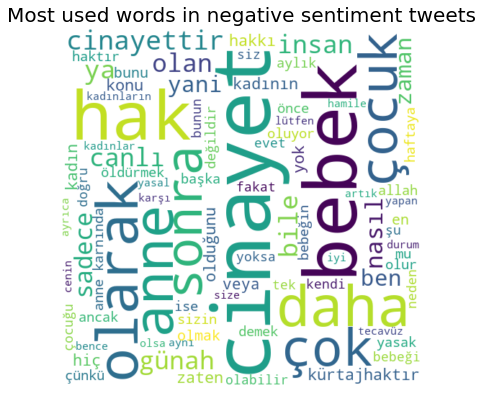

In [66]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 1'], title="Most used words in negative sentiment tweets")

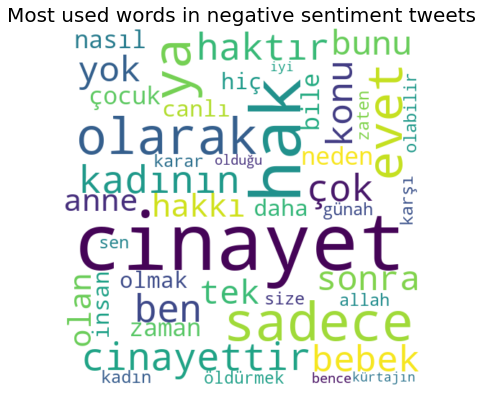

In [67]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 2'], title="Most used words in negative sentiment tweets")

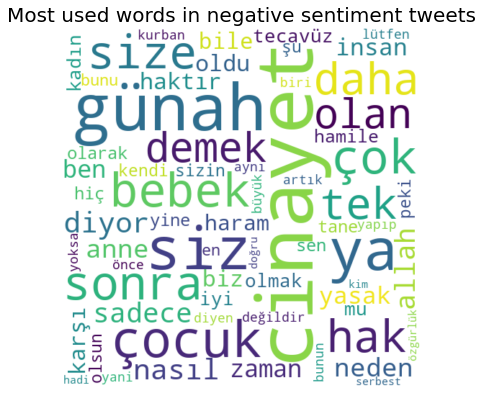

In [68]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 3'], title="Most used words in negative sentiment tweets")

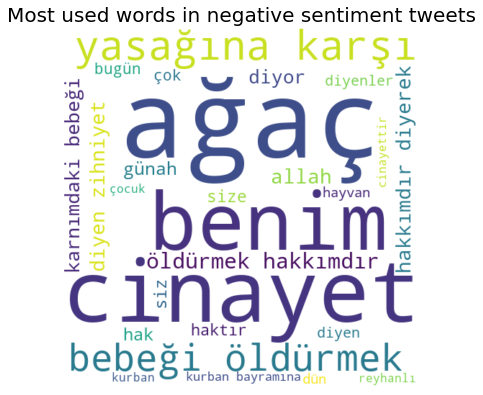

In [69]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 4'], title="Most used words in negative sentiment tweets")

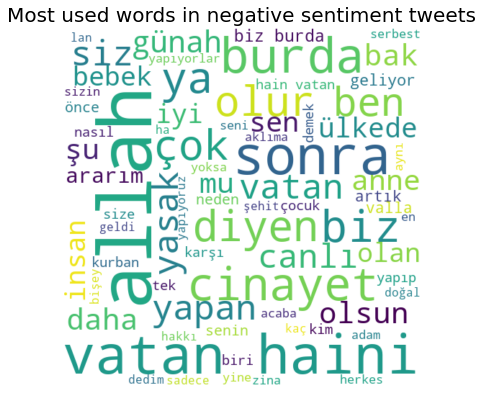

In [82]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 5'], title="Most used words in negative sentiment tweets")

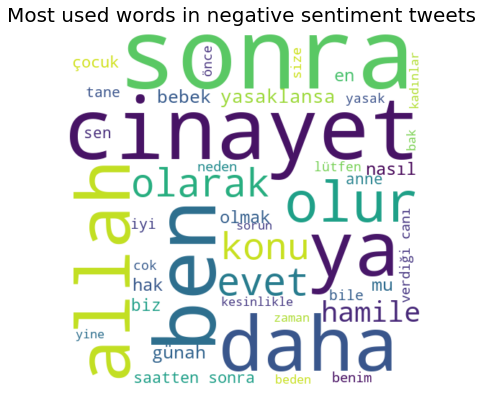

In [71]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 6'], title="Most used words in negative sentiment tweets")

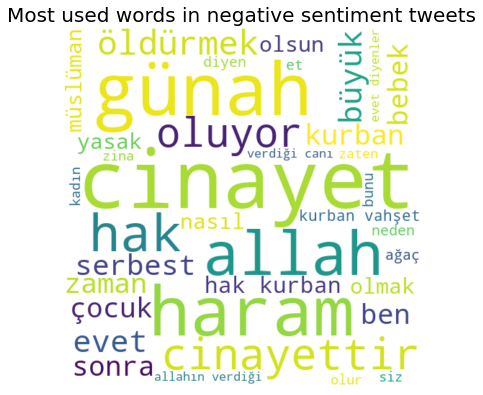

In [72]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 7'], title="Most used words in negative sentiment tweets")

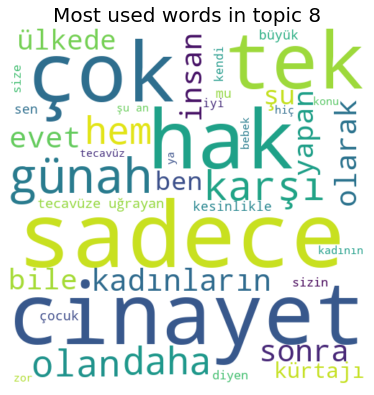

In [73]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 8'], title="Most used words in topic 8")

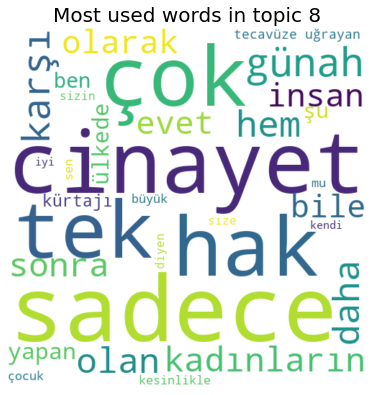

In [74]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 8'], title="Most used words in topic 8")

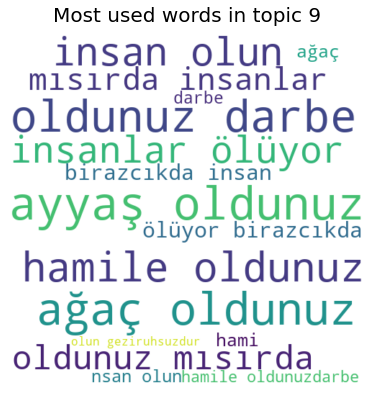

In [75]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 9'], title="Most used words in topic 9")

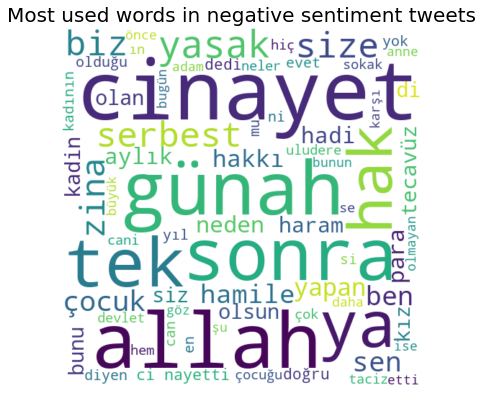

In [76]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 10'], title="Most used words in negative sentiment tweets")

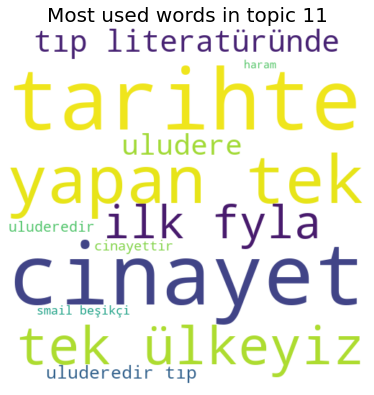

In [77]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 11'], title="Most used words in topic 11")

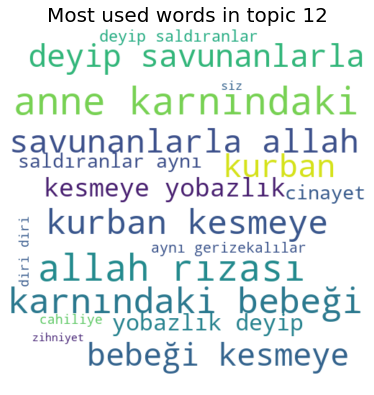

In [78]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 12'], title="Most used words in topic 12")

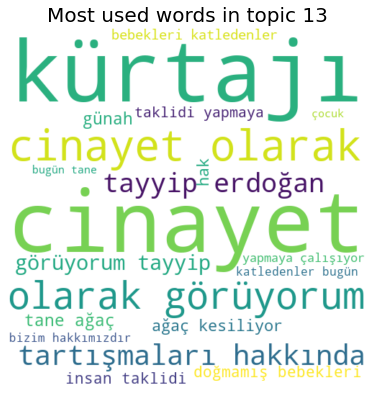

In [79]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 13'], title="Most used words in topic 13")

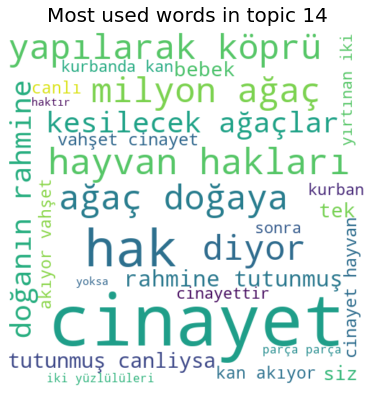

In [80]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 14'], title="Most used words in topic 14")

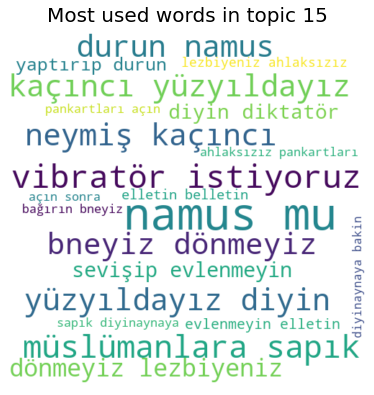

In [81]:
create_WordCloud(result['Lemma_text'].loc[result.Topic == 'type 15'], title="Most used words in topic 15")